In [8]:
#%load_ext autoreload
#%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


# basic functionalities
import re
import os
import sys
import datetime
import itertools
import math 


# data transforamtion and manipulation
import pandas as pd
import pandas_datareader.data as web
import numpy as np
# prevent crazy long pandas prints
pd.options.display.max_columns = 16
pd.options.display.max_rows = 16
pd.set_option('display.float_format', lambda x: '%.5f' % x)
np.set_printoptions(precision=5, suppress=True)


# remove warnings
import warnings
warnings.filterwarnings('ignore')


# plotting and plot stying
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
plt.style.use('seaborn')
#sns.set_style("whitegrid", {'axes.grid' : False})
#set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 80
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['text.usetex'] = False
#plt.rcParams['font.family'] = "serif"
plt.rcParams['font.serif'] = "cm"
plt.rcParams['text.latex.preamble'] = b"\usepackage{subdepth}, \usepackage{type1cm}"

from scipy import optimize

# jupyter wdgets
from ipywidgets import interactive, widgets, RadioButtons, ToggleButtons, Select, FloatSlider, FloatProgress
from IPython.display import set_matplotlib_formats, Image, IFrame

# Artificial Neural Network

<strong>Artificial neural networks (ANNs)</strong> are computing systems inspired by the biological neural networks that constitute bilological brains. Such systems learn (progressively improve performance) to do tasks by considering examples, generally without task-specific programming (if-then clauses).

An ANN is based on a collection of connected units called <strong>Perceptrons</strong> analogous to neurons in a biological brain. Each connection (synapse) between neurons can transmit a signal to another neuron. The receiving (postsynaptic) neuron can process the signal(s) and then signal downstream neurons connected to it.


# Data

Since the output variable is a contineous variable the estimation probel is called a **supervised regression problem**. The training is

$$
X = \begin{bmatrix}
3 & 5 \\
5 & 1 \\
10 & 2
\end{bmatrix}, \hspace{2cm} y = \begin{bmatrix}
75 \\
82 \\
93
\end{bmatrix}
$$ 

and further, we want to estimate $\hat{y}$ for a test data input of $\left[8, 5\right]$

In [104]:
# X = (hours sleeping, hours studying), y = Score on test
X = np.array(([3,5], [5,1], [10,2]), dtype=float)
y = np.array(([75], [82], [93]), dtype=float)

In [105]:
X

array([[  3.,   5.],
       [  5.,   1.],
       [ 10.,   2.]])

In [106]:
y

array([[ 75.],
       [ 82.],
       [ 93.]])

In [107]:
# scaling
X = X/np.amax(X, axis=0)
y = y/100

In [108]:
X

array([[ 0.3,  1. ],
       [ 0.5,  0.2],
       [ 1. ,  0.4]])

In [109]:
y

array([[ 0.75],
       [ 0.82],
       [ 0.93]])

# Perceptron

The very basic ingredient of any artificial neural network is the artificial neuron, called <strong>Perceptron</strong>. These neurons are connected via <strong>synapses</strong>. Synapses take the input $x_{ij}$ from the preceeding layer and multiply his value with a weight $w_{ij}$ and output, $x_{ij} w_{ij}$ the result to the subsequent layer. The summed and weighted input is than passed to an activation function. This output is further called the activation pertaining to a perceptron.

In [4]:
IFrame("./img/perceptron.pdf", width=1000, height=800)

In [ ]:
Sne

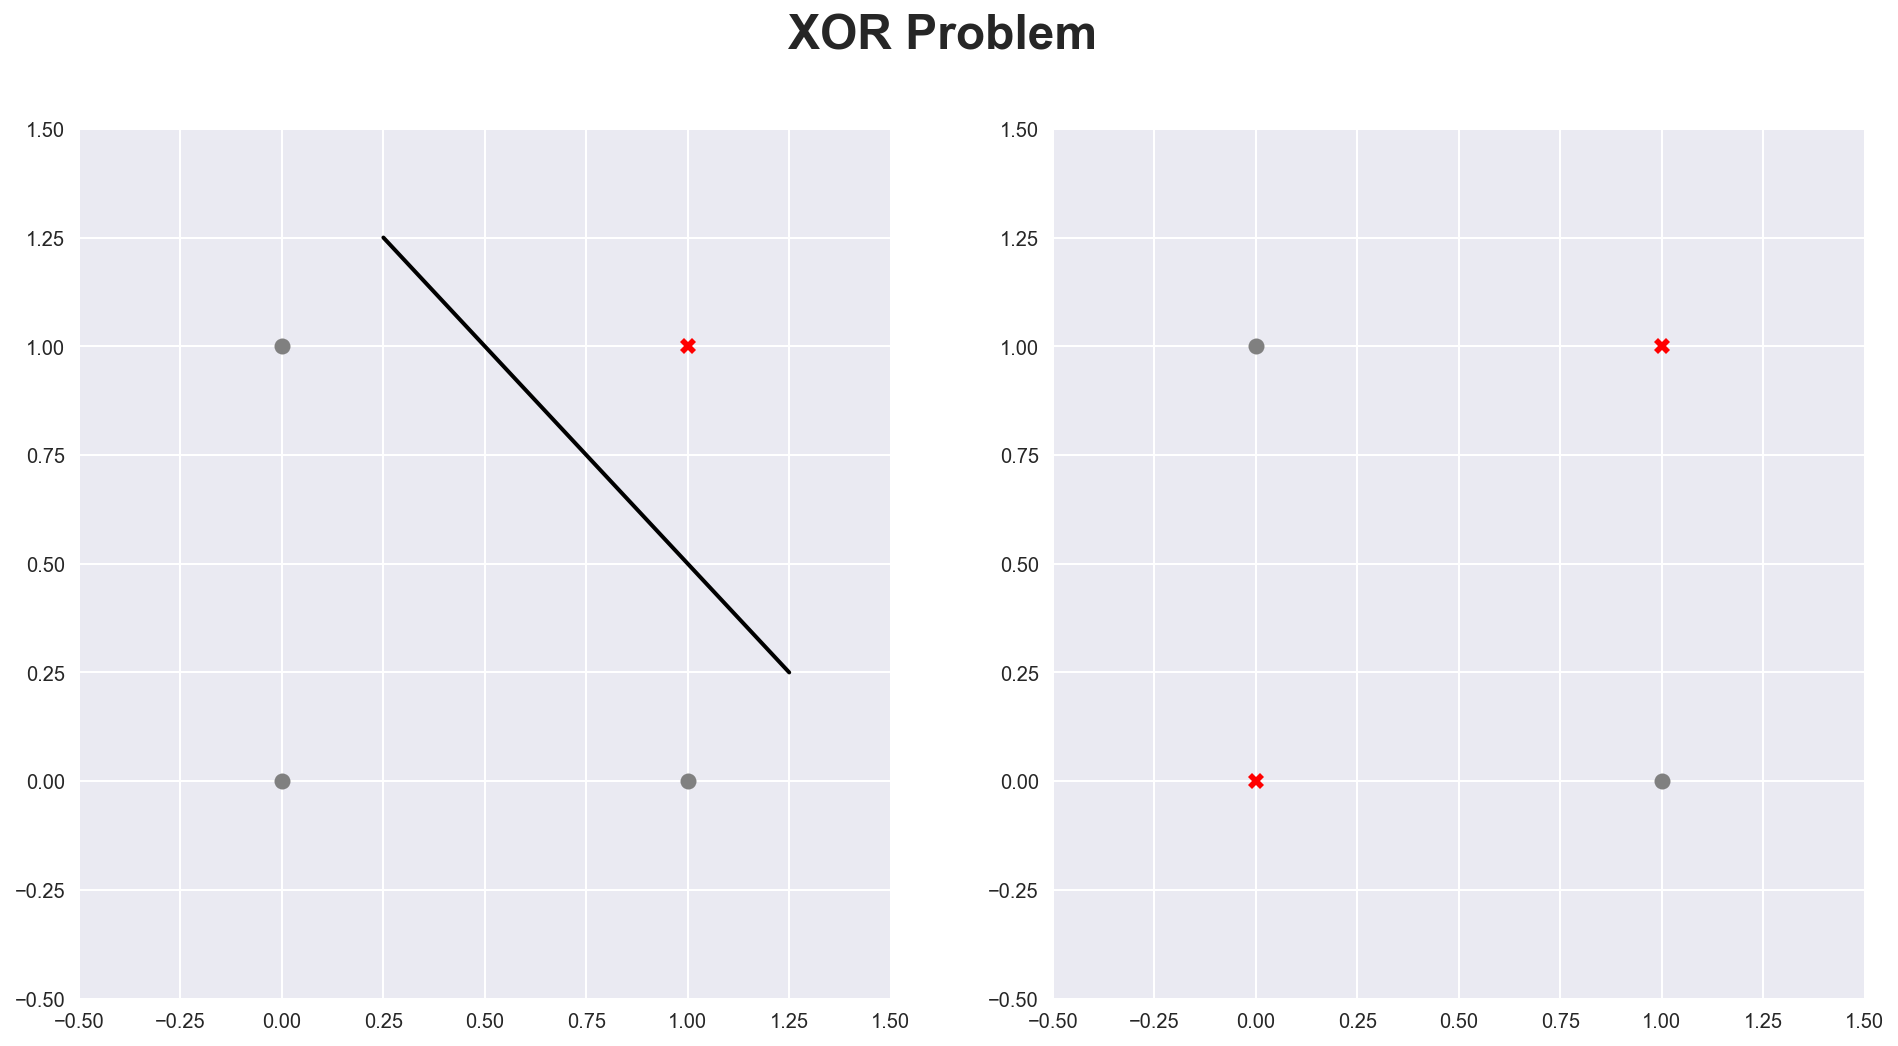

In [9]:
# initialize figur and axes
fig, axes = plt.subplots(1, 2, sharey=False, sharex=False);
fig.suptitle('XOR Problem', fontsize=24, fontweight='bold')

# classifiable plot
axes[0].plot([0,0,1], [0,1,0], 'o', color='grey')
axes[0].plot([1], [1], 'X', color='red')
axes[0].plot([0.25, 1.25], [1.25, 0.25], color='black')
axes[0].set_xlim((-0.5, 1.5))
axes[0].set_ylim((-0.5, 1.5))

# unclassifiable plot
axes[1].plot([0,1], [1,0], 'o', color='grey')
axes[1].plot([0, 1], [0, 1], 'X', color='red')
axes[1].set_xlim((-0.5, 1.5))
axes[1].set_ylim((-0.5, 1.5))

plt.show()

## Multilayer Perceptron Network

The neural network constructed in this session has two input neurons, one for every $j$ in input vector $X$, one hidden alyer with three neurons and an output layer with one neuron, correpsonding to the dimension of the desired output. These are the hyperparameters of the model which are not updated as the network is trained

In [ ]:
IFrame("./img/network.pdf", width=1000, height=800)

# Forward Propagation

The neural network is not capable of deciding the size and depth of a neural network and hence the architectual structure of the network have to be provided. What a ANN does learn are the models parameters, i. e. the weights on the synapses.

Data moves through the network by a method called <strong>forward propagation</strong>, hence, such models are called <strong>feed forward networks</strong>. Each input value  $x_{ij}$ of data input data matrix $X$ needs to be multiplied by the corresponding weights $w_{ij}^{(1)}$ of matrix $W^{(1)}$ like

$$
X \cdot W^{(1)} = z^{(2)} 
$$

where $Z^{(2)}$ is the calculated activity of the second layer, the sum of weighted inputs from each neuron. For the example we find

$$
\begin{bmatrix}
3 & 5 \\
5 & 1 \\
10 & 2
\end{bmatrix} \cdot \begin{bmatrix}
w_{11}^{(1)} & w_{12}^{(1)} & w_{13}^{(1)}\\
w_{21}^{(1)} & w_{22}^{(1)} & w_{23}^{(1)} \\
\end{bmatrix} = \begin{bmatrix}
3w_{11}^{(1)} + 5w_{21}^{(1)} & 3w_{12}^{(1)} + 5w_{22}^{(1)} & 3w_{13}^{(1)}+ 5w_{23}^{(1)}\\
5w_{11}^{(1)} + 1w_{21}^{(1)} & 5w_{12}^{(1)} + 1w_{22}^{(1)} & 5w_{13}^{(1)}+ 1w_{23}^{(1)}\\
10w_{11}^{(1)} + 2w_{21}^{(1)} & 10w_{12}^{(1)} + 2w_{22}^{(1)} & 10w_{13}^{(1)}+ 2w_{23}^{(1)}
\end{bmatrix}
$$ 

To each entry in the activation $z^{(2)}$ an **Activation Function** $f(z)$ is applied which transforms the weighted input data. This represents to which a neuron is "fired up" and further propagates the signal forward through the network. In this example the activation function is **sigmoid** and has the form

$$
f(z) = \frac{1}{1 + e^{(-z)}}
$$

The activation function needs to be differentiable for training the model later on. 

$$
a^{(2)} = f(z^{(2)})
$$

What remains to be done is to multiply $a^{(2)}$ by the second layer weights $W^{(2)}$ 

$$
z^{(3)} = a^{(2)} W^{(2)}
$$

and apply another activation function to $z^{(3)}$ to yield the estimate $\hat{y}$

$$
\hat{y} = f(z^{(3)})
$$

In [82]:
class ANN(object):
    def __init__(self):        
        #Define Hyperparameters
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 3
        
        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize, self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize, self.outputLayerSize)
        
    def feed_forward(self, X):
        #Propagate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3) 
        return yHat
        
    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))

In [83]:
ann = ANN()

In [84]:
yhat = ann.feed_forward(X)

In [85]:
yhat

array([[ 0.58257799],
       [ 0.60465201],
       [ 0.59056006]])

# Gradient descent

Using the <code>ANN</code> class to predict will yields an inaccurate result. To improve on the networks prediction one first needs to quantify the extend of how much the prediction missed the actual value using a **Cost Function**. A common cost function is the sum of squared errors

$$
E(W) = \frac{1}{2} \sum_{i=1}^n e_i^2 = \frac{1}{2}\sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2
$$

where $n$ is the total number of patterns shown to the system (number of input examples).

In [6]:
IFrame("./img/error_computation.pdf", width=1000, height=800)

In [5]:
IFrame("./img/gradient_descent.pdf", width=1000, height=800)

The smaller the overall cost $E$ the more accurate is the prediction. Remember that $\hat{y}$ is ultimately a function of all model data inputs and all model synapses weights. $\hat{y}$ can be substituted with all above functions

$$
E(W) =  \sum_{i=1}^n \frac{1}{2} \left( y - f\left(f\left(XW^{(1)}\right) W^{(2)}\right) \right)^2
$$

Since the $x_{ij}$ are fixed from the outset, the only way to improve the predicion is to adjust the weight parameters until the resulting cost is minimal. The cost minimizing parameter constellation is found with an optimization method called **Gradient Descent**

The process of minimizing the cost function is referred to as **training the model**.


The contribution of the weighted inputs to the total error are found by the partial derivatives of the loss function with respect to the weights, the <strong>gradient</strong>. This method is called <strong>gradient descent</strong>. More specifically <strong>batch gradient descent</strong> will be applied where all model weights are updated simultaneously.

However, if the cost function is non-convex, the gradient descent algorithm migth get stuck in local minima instead of the desired global minimum. For that matter, the sum of squared errors is chosen as the loss function as this is a convex function.


# Back Propagation and Perceptron Learning

Given a labeld set of data $(X, y)$ an optimal setting of parameters $W$ must be found that minimizes cost function $E$., The process of propagating the estimation error $E$ back through the network is called **Back Propagation**

## Second Layer derivation

$$
\begin{align}
\frac{\partial E}{\partial W^{(2)}} &= \frac{\partial}{\partial W^{(2)}}\frac{1}{2}\sum  \left(y - \hat{y}\right)^2 \\
&= \frac{1}{2} \sum \frac{\partial}{\partial W^{(2)}} \left(y - \hat{y}\right)^2 \\
&= \frac{1}{2} \sum  2 \left(y - \hat{y}\right) \cdot \left(-\frac{\partial \hat{y}}{\partial W^{(2)}} \right) \\
&= - \sum \left(y - \hat{y}\right) \cdot \frac{\partial \hat{y}}{\partial z^{(3)}} \frac{\partial z^{(3)}}{\partial W^{(2)}} \\
&= - \sum \left(y - \hat{y}\right) f'\left( z^{(3)}\right) \frac{\partial z^{(3)}}{\partial W^{(2)}}
\end{align}
$$

$\partial z^{(3)} / \partial W^{(2)}$ represent the change of the third layer activity with respect to the weights of the second layer. $z^{(3)}$ ís the matrix product of the second layer activity $a^{(2)}$ and second layer weights $W^{(2)}$. The activities from layer two are multiplied with their corresponding weights

$$
W^{(2)} = \begin{bmatrix}
w_{11}^{(2)} \\
w_{21}^{(2)} \\
w_{31}^{(2)} 
\end{bmatrix}, \hspace{2cm} a^{(2)} = \left[a^{(2)}_1, a^{(2)}_2, a^{(2)}_3 \right]
$$

Further,

$$
\begin{align}
\frac{\partial E}{\partial W^{(2)}} &=  - \sum \left(y - \hat{y}\right) f'\left( z^{(3)}\right) \frac{\partial z^{(3)}}{\partial W^{(2)}} \\
&= \begin{bmatrix}
-y_1 - \hat{y}_1 \\
-y_2 - \hat{y}_2  \\
-y_3 - \hat{y}_1  
\end{bmatrix} \cdot \begin{bmatrix}
f'( z^{(3)}_1) \\
f'( z^{(3)}_2)\\
f'( z^{(3)}_3)
\end{bmatrix} \cdot \frac{\partial z^{(3)}}{\partial W^{(2)}} \\
&= \begin{bmatrix}
\delta_1^{(3)} \\
\delta_2^{(3)}  \\
\delta_3^{(3)}  
\end{bmatrix} \cdot \frac{\partial z^{(3)}}{\partial W^{(2)}} \\
&= \delta^{(3)} \cdot \frac{\partial z^{(3)}}{\partial W^{(2)}} \\
&= (a^{(2)})^T \delta^{(3)}\\
\end{align} 
$$

where $\delta^{(3)}$ is the back propagating error

From the linear relation $z^{(3)} = a^{(2)} W^{(2)}$ it follows that

$$
\frac{\partial z^{(3)}}{\partial W^{(2)}} = a^{(2)} =\begin{bmatrix}
a_{11}^{(2)} &a_{12}^{(2)}&a_{13}^{(2)} \\
a_{21}^{(2)} &a_{22}^{(2)}&a_{23}^{(2)}  \\
a_{31}^{(2)} &a_{32}^{(2)}&a_{33}^{(2)}   
\end{bmatrix}
$$

$$
\delta^{(3)} = - \left(y - \hat{y}\right) f'\left( z^{(3)}\right)
$$

## Third layer derivation

$$
\begin{align}
\frac{\partial E}{\partial W^{(1)}} &=  - \left(y - \hat{y}\right) f'( z^{(3)}) \frac{\partial z^{(3)}}{\partial W^{(1)}} \\
&= \delta^{(3)} \cdot \frac{\partial z^{(3)}}{\partial W^{(1)}} \\
&= \delta^{(3)} \cdot \frac{\partial z^{(3)}}{\partial a^{(2)}} \cdot \frac{\partial a^{(2)}}{\partial W^{(1)}} \\ 
&= \delta^{(3)} \cdot (W^{(2)})^T \cdot \frac{\partial a^{(2)}}{\partial W^{(1)}} \\
&= \delta^{(3)} \cdot (W^{(2)})^T \cdot \frac{\partial a^{(2)}}{\partial z^{(2)}}  \cdot \frac{\partial z^{(2)}}{\partial W^{(1)}}\\
&= \delta^{(3)} \cdot (W^{(2)})^T \cdot f'( z^{(2)})  \cdot \frac{\partial z^{(2)}}{\partial W^{(1)}}\\
&= X^T \delta^{(3)} \cdot (W^{(2)})^T \cdot f'( z^{(2)})\\
&= X^T \delta^{(2)}\\
\end{align} 
$$

where 

$$
\delta^{(2)} = X^T \delta^{(3)} (W^{(2)})^T f'( z^{(2)})
$$

The $W$ is multiplied by the <strong>learning rate</strong> $\nu$


## Training

In [93]:
class ANN(object):
    def __init__(self):        
        #Define Hyperparameters
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 3
        
        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize)
        
    def forward(self, X):
        #Propogate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3) 
        return yHat
        
    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self,z):
        #Gradient of sigmoid
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def costFunction(self, X, y):
        #Compute cost for given X,y, use weights already stored in class.
        self.yHat = self.forward(X)
        J = 0.5*sum((y-self.yHat)**2)
        return J
        
    def costFunctionPrime(self, X, y):
        #Compute derivative with respect to W and W2 for a given X and y:
        self.yHat = self.forward(X)
        
        delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
        dJdW2 = np.dot(self.a2.T, delta3)
        
        delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
        dJdW1 = np.dot(X.T, delta2)  
        
        return dJdW1, dJdW2
    
    #Helper Functions for interacting with other classes:
    def getParams(self):
        #Get W1 and W2 unrolled into vector:
        params = np.concatenate((self.W1.ravel(), self.W2.ravel()))
        return params
    
    def setParams(self, params):
        #Set W1 and W2 using single paramater vector.
        W1_start = 0
        W1_end = self.hiddenLayerSize * self.inputLayerSize
        self.W1 = np.reshape(params[W1_start:W1_end], (self.inputLayerSize , self.hiddenLayerSize))
        W2_end = W1_end + self.hiddenLayerSize*self.outputLayerSize
        self.W2 = np.reshape(params[W1_end:W2_end], (self.hiddenLayerSize, self.outputLayerSize))
        
    def computeGradients(self, X, y):
        dJdW1, dJdW2 = self.costFunctionPrime(X, y)
        return np.concatenate((dJdW1.ravel(), dJdW2.ravel()))

def computeNumericalGradient(N, X, y):
        paramsInitial = N.getParams()
        numgrad = np.zeros(paramsInitial.shape)
        perturb = np.zeros(paramsInitial.shape)
        e = 1e-4

        for p in range(len(paramsInitial)):
            #Set perturbation vector
            perturb[p] = e
            N.setParams(paramsInitial + perturb)
            loss2 = N.costFunction(X, y)
            
            N.setParams(paramsInitial - perturb)
            loss1 = N.costFunction(X, y)

            #Compute Numerical Gradient
            numgrad[p] = (loss2 - loss1) / (2*e)

            #Return the value we changed to zero:
            perturb[p] = 0
            
        #Return Params to original value:
        N.setParams(paramsInitial)

        return numgrad 

In [94]:
class Trainer(object):
    def __init__(self, N):
        #Make Local reference to network:
        self.N = N
        
    def callbackF(self, params):
        self.N.setParams(params)
        self.J.append(self.N.costFunction(self.X, self.y))   
        
    def costFunctionWrapper(self, params, X, y):
        self.N.setParams(params)
        cost = self.N.costFunction(X, y)
        grad = self.N.computeGradients(X, y)
        
        return cost, grad
        
    def train(self, X, y):
        #Make an internal variable for the callback function:
        self.X = X
        self.y = y

        #Make empty list to store costs:
        self.J = []
        
        params0 = self.N.getParams()

        options = {'maxiter': 200, 'disp' : True}
        _res = optimize.minimize(self.costFunctionWrapper, params0, jac=True, method='BFGS', \
                                 args=(X, y), options=options, callback=self.callbackF)

        self.N.setParams(_res.x)
        self.optimizationResults = _res

In [95]:
ann = ANN()

In [96]:
trainer = Trainer(ann)
trainer.train(X, y)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 35
         Function evaluations: 38
         Gradient evaluations: 38


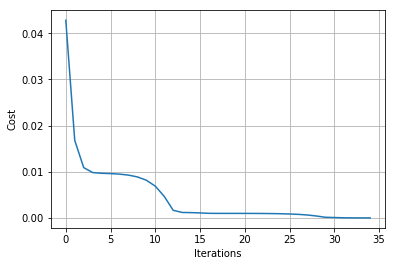

In [103]:
plt.plot(trainer.J)
plt.grid(1)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

## Testing, Overfitting and Regularization